In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import joblib

## Load the data

In [38]:
liver=pd.read_csv('Liver Patient Data.csv')

In [39]:
liver.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Protiens,ALB Albumin,A/G,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [40]:
liver.shape

(30691, 11)

##  Check for null values

In [41]:
liver.isnull().sum()

Age                   2
Gender              902
Total Bilirubin     648
Direct Bilirubin    561
Alkphos             796
Sgpt                538
Sgot                462
Total Protiens      463
ALB Albumin         494
A/G                 559
Result                0
dtype: int64

In [42]:
liver=liver.dropna()

In [43]:
liver.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgot                0
Total Protiens      0
ALB Albumin         0
A/G                 0
Result              0
dtype: int64

In [44]:
liver.shape

(27158, 11)

## Transform Gender to numerical data

In [45]:
le=LabelEncoder()

In [46]:
liver['Sex']=liver[['Gender']].apply(le.fit_transform)

In [47]:
liver.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Protiens,ALB Albumin,A/G,Result,Sex
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


<Axes: >

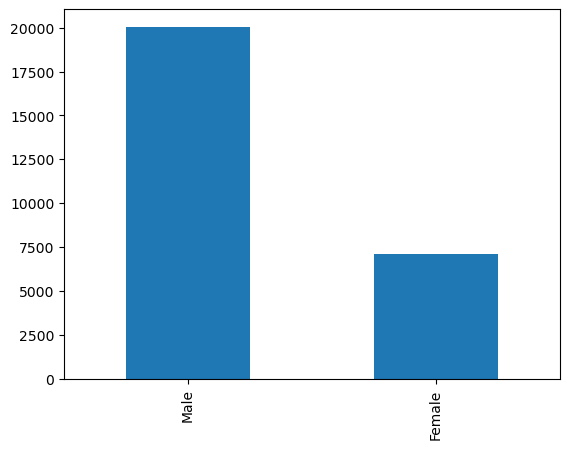

In [48]:
liver['Gender'].value_counts().plot(kind='bar')

<Axes: >

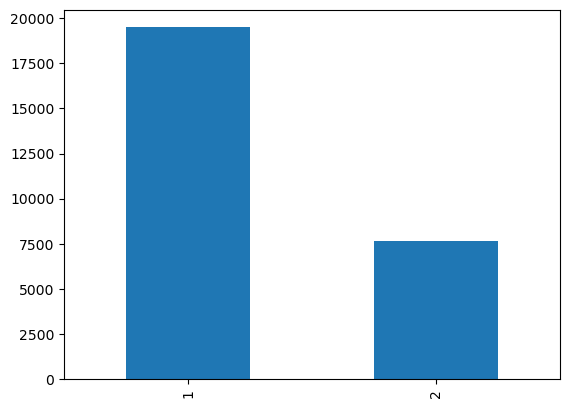

In [49]:
liver['Result'].value_counts().plot(kind='bar')

In [50]:
sn.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

## Total number of male vs female

<Axes: xlabel='Gender', ylabel='count'>

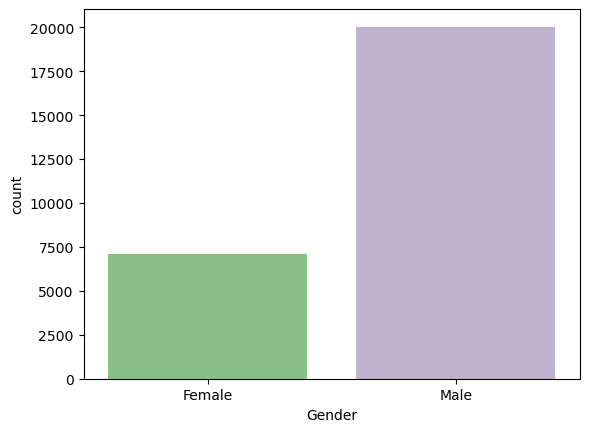

In [53]:
sn.countplot(x='Gender',data=liver,palette="Accent")

##  Patients with Liver Disease vs Patiets with no liver disease

<Axes: xlabel='Result', ylabel='count'>

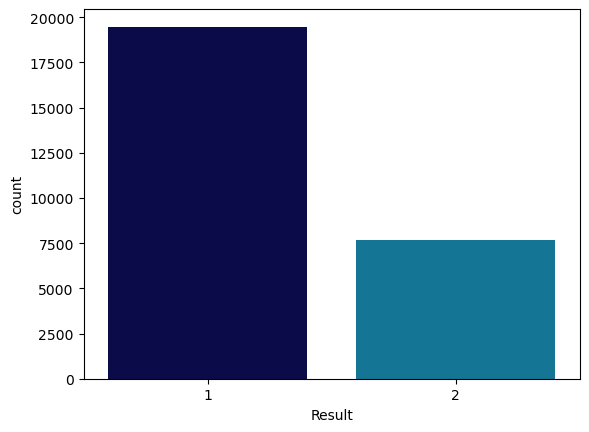

In [51]:
sn.countplot(x='Result',data=liver,palette="ocean")

<Axes: xlabel='Gender', ylabel='count'>

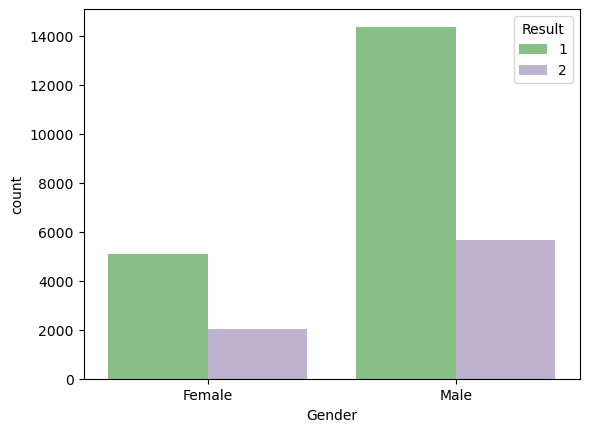

In [52]:
sn.countplot(x='Gender',data=liver,palette="Accent",hue='Result')

C:\Users\Piemicah\AppData\Local\Temp\ipykernel_5680\627752564.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(liver.corr(),annot=True,fmt='1.2f')


<Axes: >

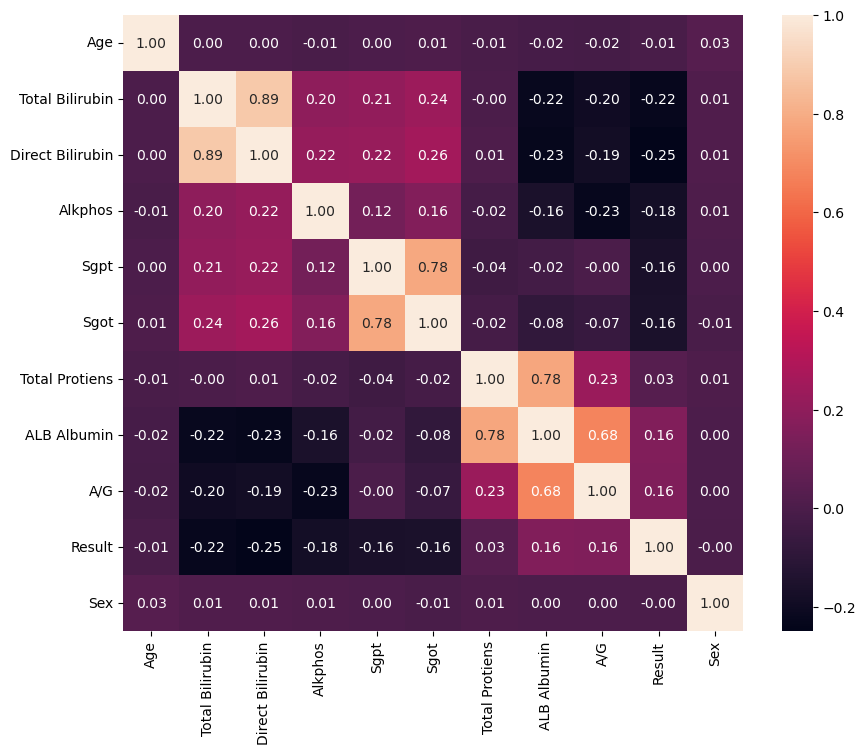

In [14]:
plt.figure(figsize=(10,8))
sn.heatmap(liver.corr(),annot=True,fmt='1.2f')

### It can be seen clearly that 'Age' and "Gender" have no correlation with other columns.

### Drop "Age","Gender" and "Sex" respectively

In [15]:
liver=liver.drop(columns=['Age','Sex','Gender'])

In [16]:
liver.head()

,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Protiens,ALB Albumin,A/G,Result
0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


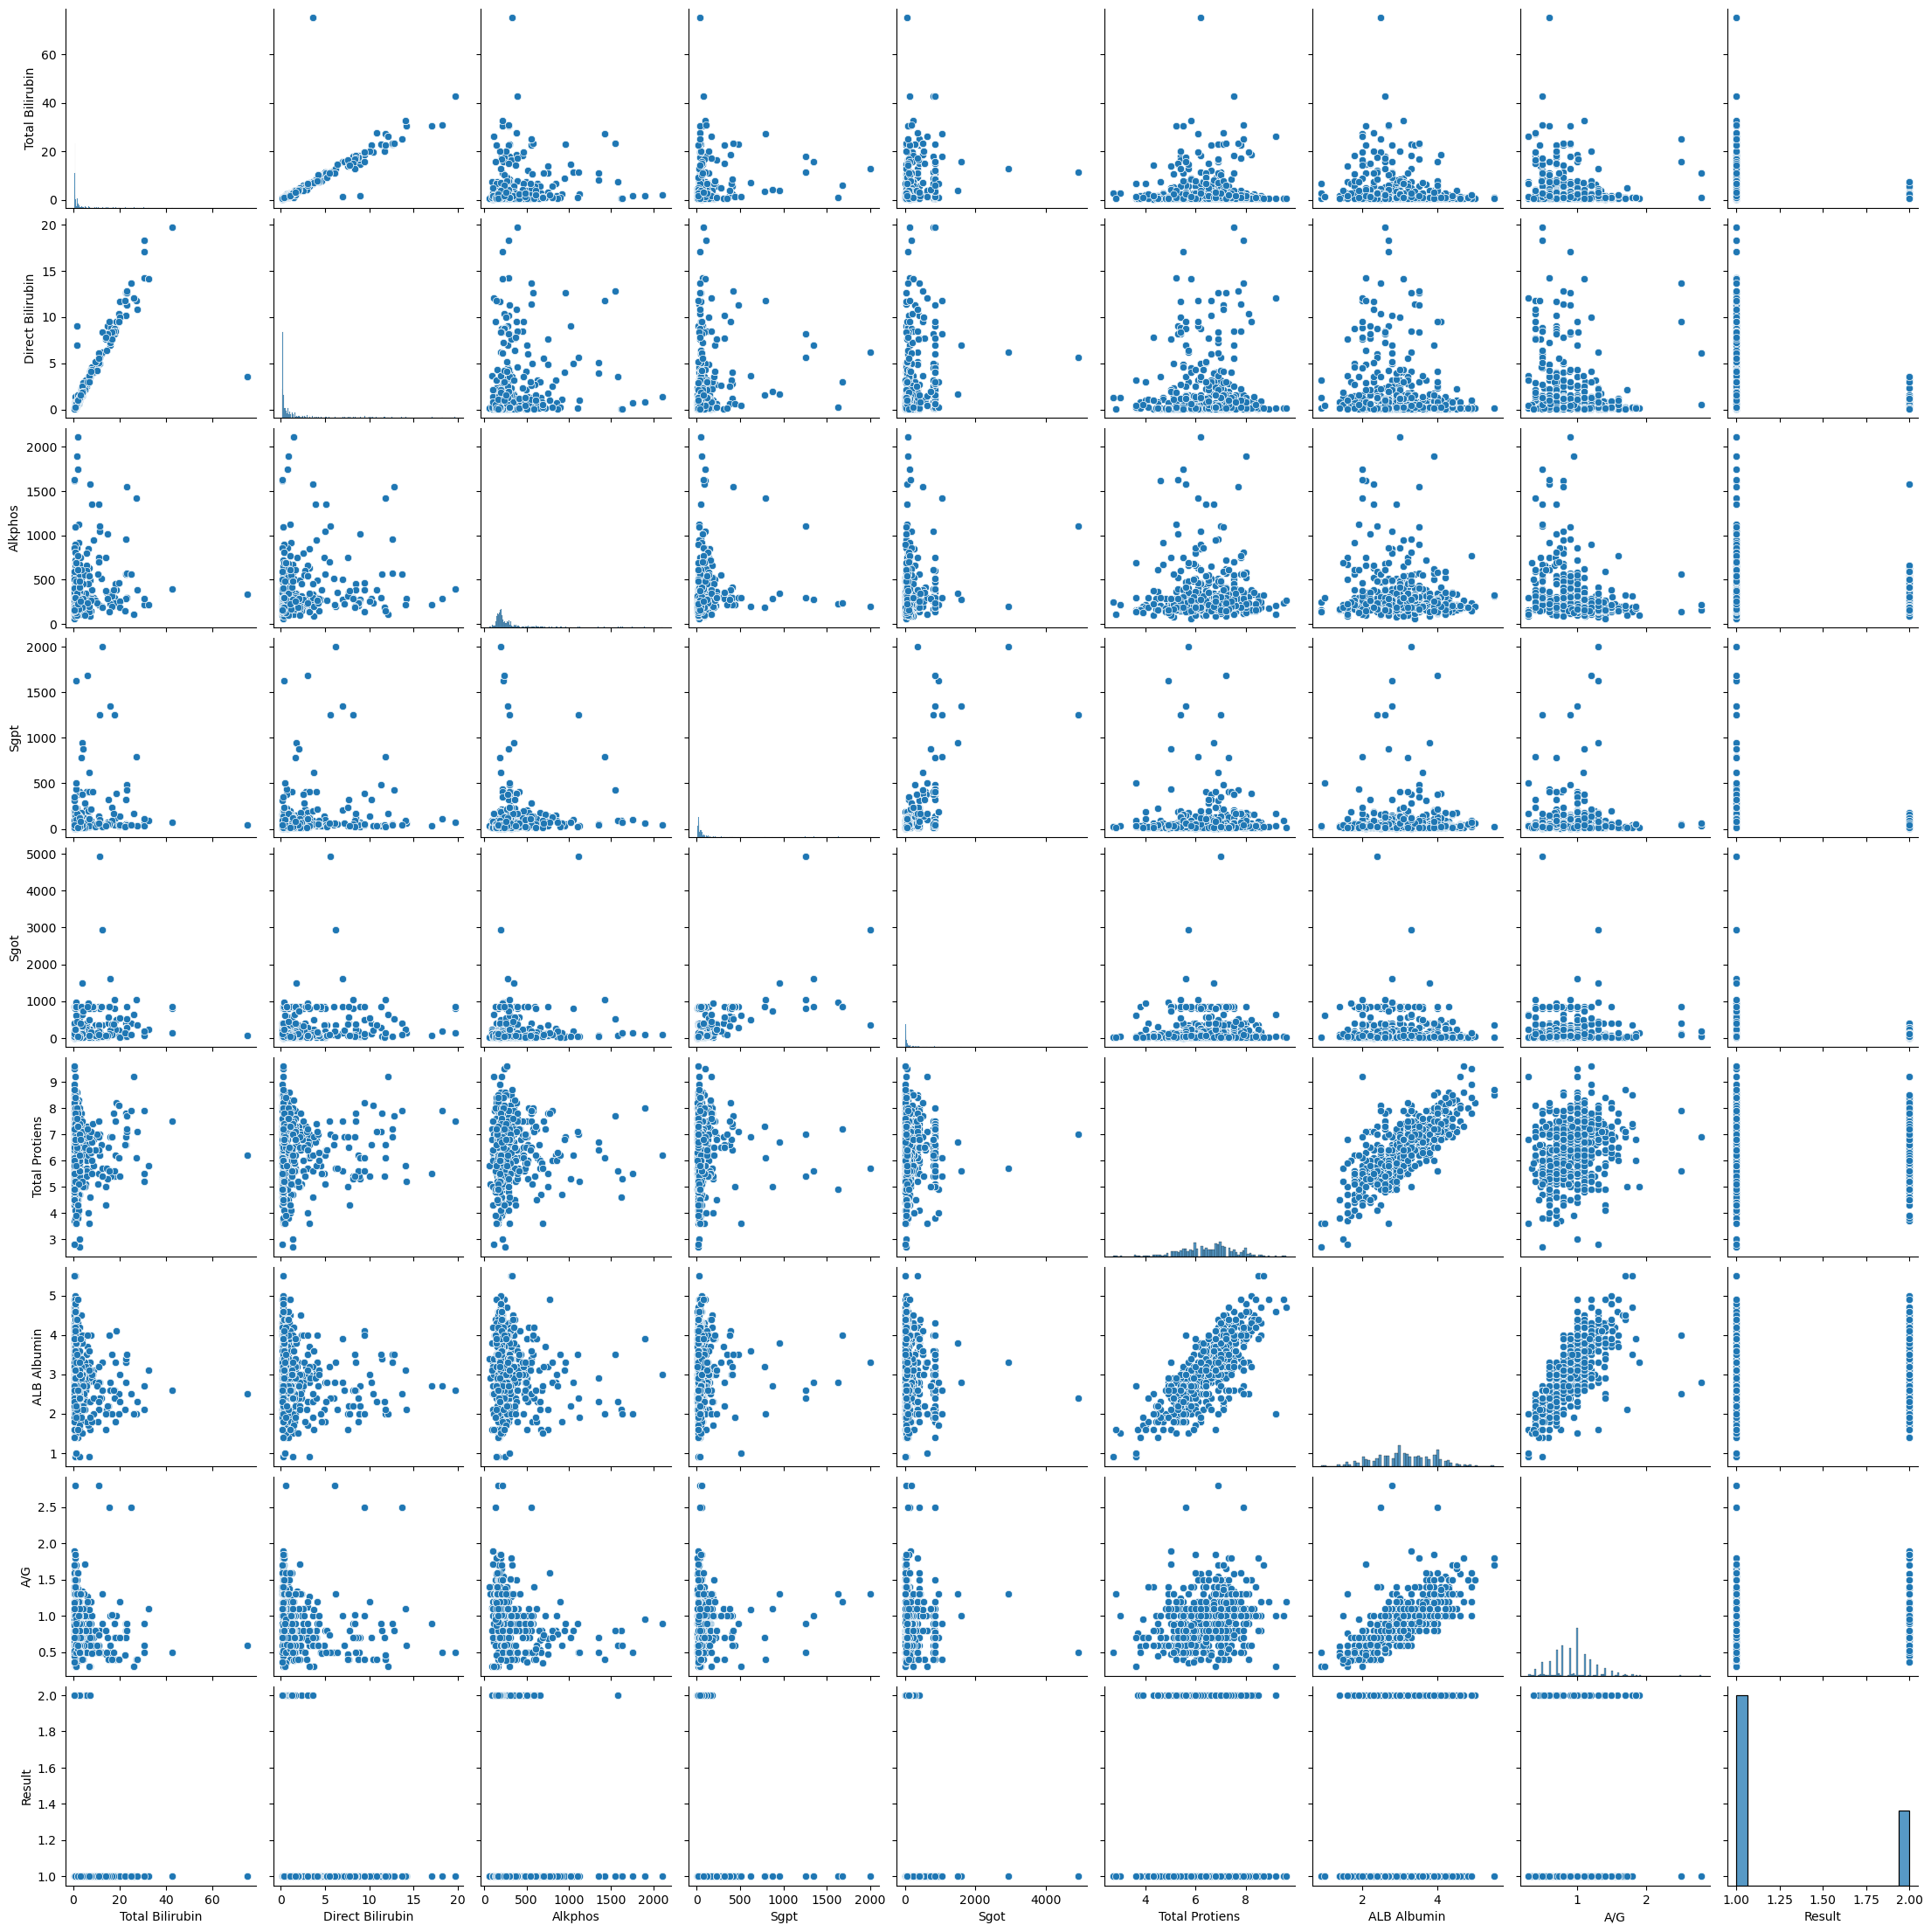

In [17]:
sn.pairplot(liver)

### Separate input from output

In [18]:
x=liver.drop(columns='Result')

In [19]:
y=liver[['Result']]

In [20]:
x.head()

,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Protiens,ALB Albumin,A/G
0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40


In [21]:
y.head()

,Result
0,1
1,1
2,1
3,1
4,1


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [23]:
model=DecisionTreeClassifier()

In [24]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
model.predict([[0.5,0.1,187,16,18,6.8,3.6,0.8]])

C:\Users\Piemicah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [26]:
def predict(a):
    r=model.predict(a)
    if r[0]==1: return 'Have Liver Problem'
    else: return 'No Liver Problem'

In [27]:
predict([[0.7,0.1,187,16,18,6.8,3.3,0.9]])

C:\Users\Piemicah\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Have Liver Problem'

In [28]:
model.score(x_test,y_test)*100

99.94108983799705

### Save the model to a file

In [29]:
joblib.dump(model,'liver_predictor.joblib')

['liver_predictor.joblib']